# Set-up environment

In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q timm

# Way#1 Models

In [ ]:
from transformers import ViTConfig, ViTForImageClassification
# option 1: load with randomly initialized weights (train from scratch)
config = ViTConfig(num_hidden_layers=12, hidden_size=768)
model = ViTForImageClassification(config)

In [ ]:
# authenticate with the hub by providing our token
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper

In [ ]:
from transformers import ViTFeatureExtractor
feature_extractor = ViTFeatureExtractor()
# or, to load one that corresponds to a checkpoint on the hub:
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

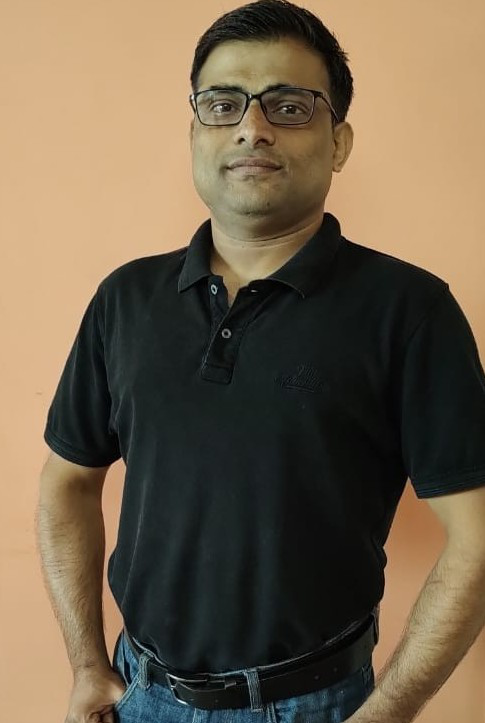

In [ ]:
from PIL import Image
import requests
url = 'https://s3.amazonaws.com/moonup/production/uploads/1662730880670-61e4006006a27a84a78caa12.jpeg'
#My photo: https://s3.amazonaws.com/moonup/production/uploads/1662730879864-61e4006006a27a84a78caa12.jpeg
image = Image.open(requests.get(url, stream=True).raw)
image.save("cats.png")
image

# Way#2 Auto API

In [ ]:
#1. Using "Image classification", predict which class(es) (i.e. items) belong to it. Out is 'score and 'Label", 'Box', 
!pip install -q transformers

In [ ]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")

In [ ]:
from transformers import pipeline
image_pipe = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


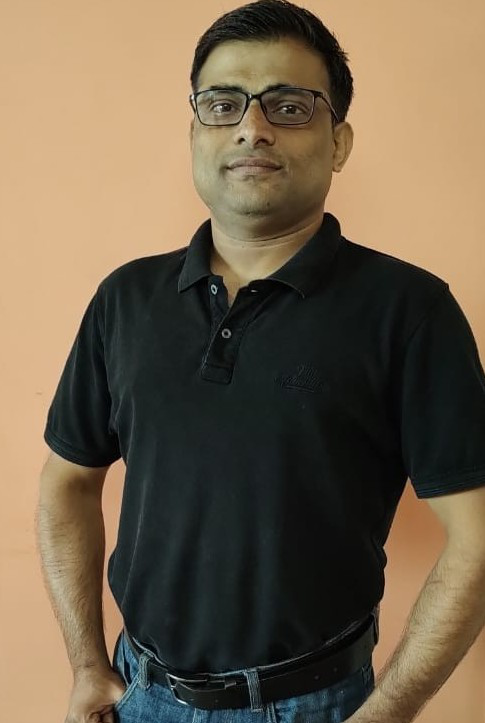

In [ ]:
from PIL import Image
import requests
url = 'https://s3.amazonaws.com/moonup/production/uploads/1662730880670-61e4006006a27a84a78caa12.jpeg'
#My photo: https://s3.amazonaws.com/moonup/production/uploads/1662730879864-61e4006006a27a84a78caa12.jpeg
image = Image.open(requests.get(url, stream=True).raw)
image.save("cats.png")
image

In [ ]:
image_pipe(image) #Image classification is probably the simplest vision task: given an image, predict which class(es) belong to it.

[{'score': 0.3874032199382782, 'label': 'jersey, T-shirt, tee shirt'},
 {'score': 0.07568158209323883, 'label': 'sweatshirt'},
 {'score': 0.03308723494410515, 'label': 'cardigan'},
 {'score': 0.029440071433782578, 'label': 'jean, blue jean, denim'},
 {'score': 0.01905611902475357, 'label': 'Windsor tie'}]

# Way#3 Pipeline API

In [ ]:
# load a ConvNeXT model
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/convnext-tiny-224")
model = AutoModelForImageClassification.from_pretrained("facebook/convnext-tiny-224")

image_pipe = pipeline("image-classification", 
                      model=model,
                      feature_extractor=feature_extractor)

In [ ]:
image_pipe(image)

[{'score': 0.6726955771446228, 'label': 'jersey, T-shirt, tee shirt'},
 {'score': 0.014740790240466595, 'label': 'cowboy hat, ten-gallon hat'},
 {'score': 0.008865877985954285, 'label': 'sombrero'},
 {'score': 0.006968586705625057, 'label': 'bulletproof vest'},
 {'score': 0.006367862690240145, 'label': 'sunglass'}]

# Way#4 Object detection pipeline

In [ ]:
!pip install -q timm

In [ ]:
object_detection_pipe = pipeline("object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.8/dist-packages/transformers/models/detr/image_processing_detr.py:773: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [ ]:
results = object_detection_pipe(image)
results

[{'score': 0.9301962852478027,
  'label': 'tie',
  'box': {'xmin': 203, 'ymin': 276, 'xmax': 228, 'ymax': 336}},
 {'score': 0.9995443224906921,
  'label': 'person',
  'box': {'xmin': 34, 'ymin': 0, 'xmax': 484, 'ymax': 723}}]

In [ ]:
import matplotlib.pyplot as plt
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125], [0.494, 0.184, 0.556], [0.466, 0.674, 0.188]]

def plot_results(image, results):
    plt.figure(figsize=(16,10))
    plt.imshow(image)
    ax = plt.gca()
    colors = COLORS * 100
    for result, color in zip(results, colors):
        box = result['box']
        xmin, xmax, ymin, ymax = box['xmin'], box['xmax'], box['ymin'], box['ymax']
        label = result['label']
        prob = result['score']
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=color, linewidth=3))
        text = f'{label}: {prob:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

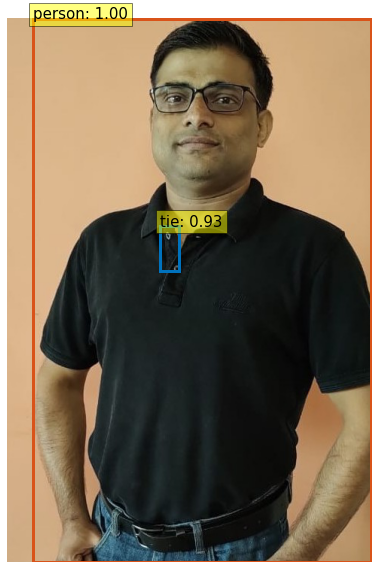

In [ ]:
plot_results(image, results)

# Way#5 Visual question answering (VQA)

In [ ]:
#2. Using 'Visual question answering (VQA)", ask a question, relevant to the image and get the answer
!pip install -q  datasets

In [ ]:
from datasets import load_dataset 

# dataset = load_dataset("cifar100")

In [ ]:
dataset = load_dataset("imagefolder", data_files="https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz")

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [ ]:
question = "how many person are there?"
encoding = processor(image, question, return_tensors="pt")
print(encoding.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'pixel_values', 'pixel_mask'])


In [ ]:
# forward pass
outputs = model(**encoding)
logits = outputs.logits

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[predicted_class_idx])

Predicted answer: 1


# Way#6 CLIP

In [ ]:
#3. Using 'CLIP', get higher score to a class label, which is more relevant
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
inputs = processor(text=["two persons are standing", "one person is standing"], images=image, return_tensors="pt", padding=True)

In [ ]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs)

tensor([[0.2077, 0.7923]], grad_fn=<SoftmaxBackward0>)


In [ ]:
zero_shot = pipeline("zero-shot-image-classification")

No model was supplied, defaulted to openai/clip-vit-base-patch32 and revision f4881ba (https://huggingface.co/openai/clip-vit-base-patch32).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
zero_shot(images=image, candidate_labels=["two persons are standing", "one person is standing"])

[{'score': 0.9542348384857178, 'label': 'one person is standing'},
 {'score': 0.04576510936021805, 'label': 'two persons are standing'}]

# Way#7 VisionEncoderDecoderModel

In [ ]:
#4. Using 'VisionEncoderDecoderModel ', get reasonable image captioning results
from transformers import VisionEncoderDecoderModel
# initialize a vit-bert from a pretrained ViT and a pretrained BERT model. Note that the cross-attention layers will be randomly initialized
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-224-in21k", "bert-base-uncased"
)
# saving model after fine-tuning
model.save_pretrained("./vit-bert")
# load fine-tuned model
model = VisionEncoderDecoderModel.from_pretrained("./vit-bert")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.11.crossattention.self.key.bias', 'bert.encoder.layer.10.crossattention.output.dense.weight', 'bert.encoder.layer.7.crossattention.self.value.weight', 'bert.encoder.layer.9.crossattention.output.LayerNorm.weight', 'bert

In [ ]:
from transformers import AutoTokenizer
repo_name = "ydshieh/vit-gpt2-coco-en"

feature_extractor = ViTFeatureExtractor.from_pretrained(repo_name)
tokenizer = AutoTokenizer.from_pretrained(repo_name)
model = VisionEncoderDecoderModel.from_pretrained(repo_name)

In [ ]:
pixel_values = feature_extractor(image, return_tensors="pt").pixel_values
# autoregressively generate text (using beam search or other decoding strategy)
generated_ids = model.generate(pixel_values, max_length=16, num_beams=4, return_dict_in_generate=True)

In [ ]:
# decode into text
preds = tokenizer.batch_decode(generated_ids[0], skip_special_tokens=True)
preds = [pred.strip() for pred in preds]
print(preds)

['a man with glasses standing in front of a wall']
